In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
data = pd.read_csv("rabobank_data.csv", header = None, delimiter = ';')
data = data.rename(columns=data.iloc[0])
data = data.drop(0)
data['count'] = data['count'].astype(np.int64)
data['total'] = data['total'].astype(np.int64)

C:\Users\Dev\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
temp = data.groupby(['end_id']).count()['count'].value_counts()
df = pd.DataFrame(data=temp)
df['degree'] = df.index
df = df.sort_values('degree',ascending=False)
df['cumsum'] = df['count'].cumsum()

Text(0, 0.5, 'Frequency')

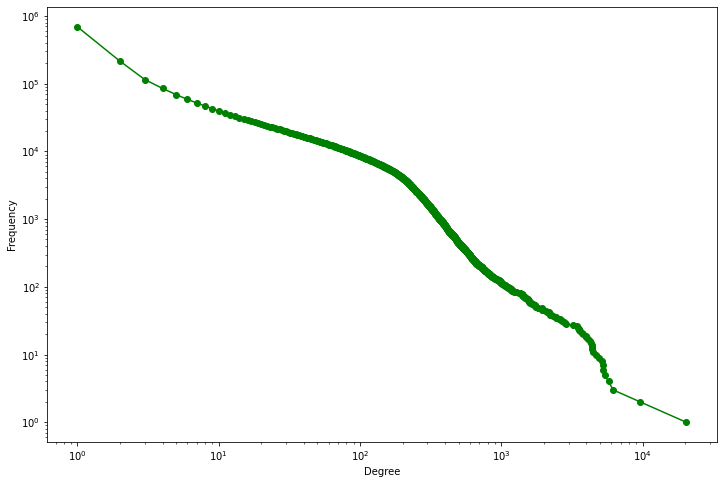

In [4]:
plt.figure(figsize = (12,8))
plt.loglog(df['degree'],df['cumsum'],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')